In [2]:
%matplotlib inline
from pinn.io import load_ds
from ase.io import write
from ase import Atoms
import matplotlib.pyplot as plt
import numpy as np
from pinn.utils import get_atomic_dress


In [3]:
ds = load_ds('../datasets/pils-v2-filtered.yml')
# e, residue = get_atomic_dress(ds, [1,6,7,8])

In [16]:
e_list = []
f_list = []
traj = []
for datum in ds.take(2000).as_numpy_iterator():
    natoms = len(datum['elems'])
    e_list.append(datum['e_data']/natoms)
    f_list.append(np.diag(datum['cell']).flatten())
    traj.append(Atoms(datum['elems'], positions=datum['coord'], cell=datum['cell'], pbc=True))
f_list = np.concatenate(f_list)

In [14]:
e_list_1 = e_list.copy()
f_list_1 = f_list.copy()

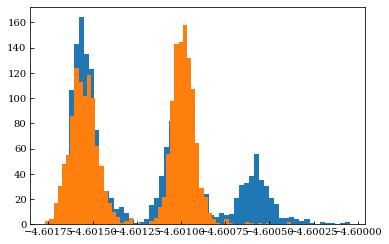

In [12]:
plt.hist(e_list, 59)
plt.hist(e_list_1, 59);
